In [47]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential, datasets, regularizers
from keras.layers import Dense, Flatten, Dropout

In [2]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
# Load the Fashion MNIST dataset
fashion_mnist = datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train_full.shape, y_train_full.shape

((60000, 28, 28), (60000,))

In [5]:
X_train, X_valid = X_train_full[:50000], X_train_full[50000:]
y_train, y_valid = y_train_full[:50000], y_train_full[50000:]

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [7]:
X_train = X_train/255
X_valid = X_valid/255
X_test = X_test/255

In [8]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

/opt/anaconda3/envs/dev/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(x=X_train, y=y_train, batch_size=128, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 935us/step - accuracy: 0.6920 - loss: 0.9107 - val_accuracy: 0.8443 - val_loss: 0.4490
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - accuracy: 0.8534 - loss: 0.4156 - val_accuracy: 0.8625 - val_loss: 0.3914
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - accuracy: 0.8667 - loss: 0.3674 - val_accuracy: 0.8675 - val_loss: 0.3685
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - accuracy: 0.8779 - loss: 0.3313 - val_accuracy: 0.8728 - val_loss: 0.3489
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - accuracy: 0.8867 - loss: 0.3126 - val_accuracy: 0.8792 - val_loss: 0.3288
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - accuracy: 0.8892 - loss: 0.3003 - val_accuracy: 0.8753 - val_loss: 0.3502
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step - accuracy: 0.8947 - loss: 0.2834 - val_accuracy: 0.8805 - val_loss: 0.3296
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - accuracy: 0.8990 - loss: 0.2711 - 

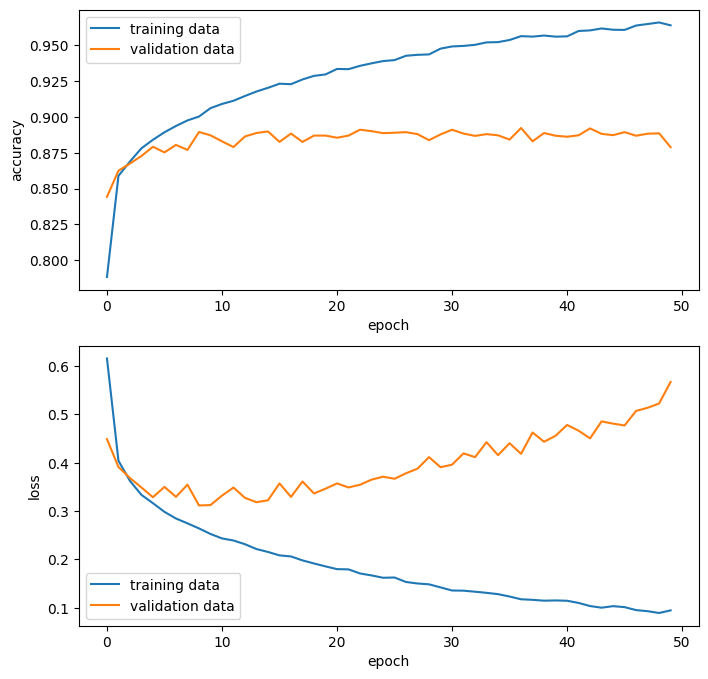

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(acc, label='training data')
plt.plot(val_acc, label='validation data')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(loss, label='training data')
plt.plot(val_loss, label='validation data')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

## the above is a clear case of overfitting. We will try to reduce the overfitting using the below regularization methods

#### l2 regularization

In [29]:
model4 = Sequential()
model4.add(Flatten(input_shape=(28,28)))
model4.add(Dense(128, activation='relu', kernel_regularizer= regularizers.l2(0.005)))
model4.add(Dense(64, activation='relu', kernel_regularizer= regularizers.l2(0.005)))
model4.add(Dense(32, activation='relu', kernel_regularizer= regularizers.l2(0.005)))
model4.add(Dense(10, activation='softmax'))

In [30]:
model4.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [31]:
history4 = model4.fit(x=X_train, y=y_train, batch_size=128, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6702 - loss: 1.9244 - val_accuracy: 0.8223 - val_loss: 0.8771
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - accuracy: 0.8257 - loss: 0.8337 - val_accuracy: 0.8324 - val_loss: 0.7558
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - accuracy: 0.8311 - loss: 0.7337 - val_accuracy: 0.8396 - val_loss: 0.6974
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - accuracy: 0.8330 - loss: 0.6936 - val_accuracy: 0.8290 - val_loss: 0.6901
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - accuracy: 0.8417 - loss: 0.6577 - val_accuracy: 0.8405 - val_loss: 0.6459
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - accuracy: 0.8434 - loss: 0.6363 - val_accuracy: 0.8235 - val_loss: 0.6640
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - accuracy: 0.8466 - loss: 0.6137 - val_accuracy: 0.8364 - val_loss: 0.6386
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - accuracy: 0.8486 - loss: 0.6011 - va

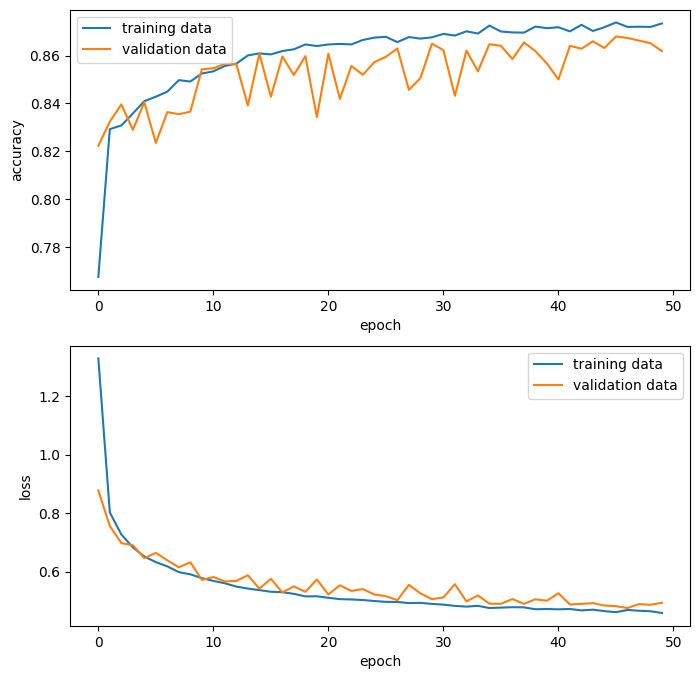

In [32]:
acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']

loss = history4.history['loss']
val_loss = history4.history['val_loss']

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(acc, label='training data')
plt.plot(val_acc, label='validation data')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(loss, label='training data')
plt.plot(val_loss, label='validation data')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

### l1 regularizer

In [37]:
model6 = Sequential()
model6.add(Flatten(input_shape=(28,28)))
model6.add(Dense(128, activation='relu', kernel_regularizer= regularizers.l1(0.005)))
model6.add(Dense(64, activation='relu', kernel_regularizer= regularizers.l1(0.005)))
model6.add(Dense(32, activation='relu', kernel_regularizer= regularizers.l1(0.005)))
model6.add(Dense(10, activation='softmax'))

In [39]:
model6.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [40]:
history6 = model6.fit(x=X_train, y=y_train, batch_size=128, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6232 - loss: 9.5191 - val_accuracy: 0.7515 - val_loss: 1.7101
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - accuracy: 0.7510 - loss: 1.6190 - val_accuracy: 0.7675 - val_loss: 1.4141
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - accuracy: 0.7699 - loss: 1.3777 - val_accuracy: 0.7712 - val_loss: 1.2852
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step - accuracy: 0.7781 - loss: 1.2539 - val_accuracy: 0.7826 - val_loss: 1.1885
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - accuracy: 0.7781 - loss: 1.1812 - val_accuracy: 0.7746 - val_loss: 1.1536
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - accuracy: 0.7837 - loss: 1.1215 - val_accuracy: 0.7808 - val_loss: 1.0927
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - accuracy: 0.7852 - loss: 1.0815 - val_accuracy: 0.7849 - val_loss: 1.0881
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - accuracy: 0.7925 - loss: 1.0555 - va

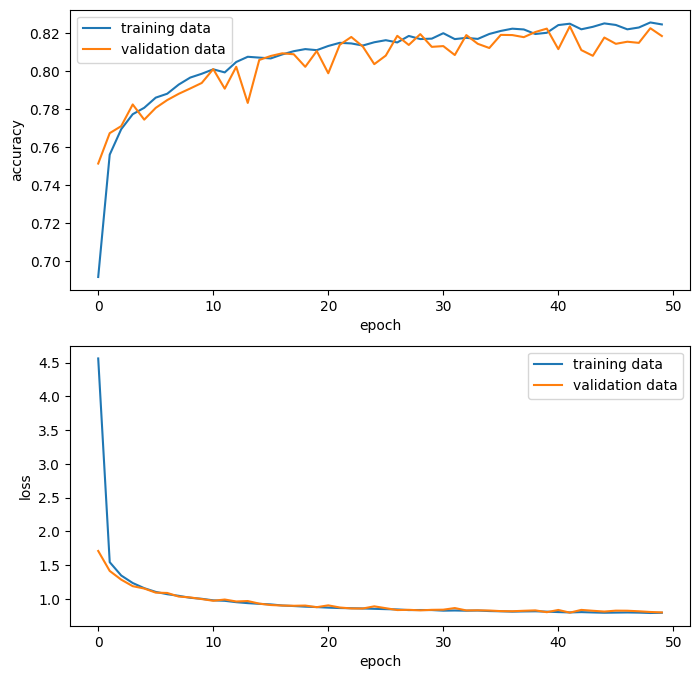

In [41]:
acc = history6.history['accuracy']
val_acc = history6.history['val_accuracy']

loss = history6.history['loss']
val_loss = history6.history['val_loss']

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(acc, label='training data')
plt.plot(val_acc, label='validation data')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(loss, label='training data')
plt.plot(val_loss, label='validation data')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

### drop out regularization

In [56]:
model10 = Sequential()
model10.add(Flatten(input_shape=(28,28)))
model10.add(Dense(128, activation='relu'))
model10.add(Dropout(rate=0.4))
model10.add(Dense(64, activation='relu'))
model10.add(Dropout(rate=0.3))
model10.add(Dense(32, activation='relu'))
model10.add(Dense(10, activation='softmax'))

In [57]:
model10.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [58]:
history10 = model10.fit(x=X_train, y=y_train, batch_size=128, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5853 - loss: 1.1389 - val_accuracy: 0.8284 - val_loss: 0.4762
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - accuracy: 0.8065 - loss: 0.5410 - val_accuracy: 0.8403 - val_loss: 0.4299
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8260 - loss: 0.4871 - val_accuracy: 0.8552 - val_loss: 0.3956
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8378 - loss: 0.4471 - val_accuracy: 0.8615 - val_loss: 0.3787
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8478 - loss: 0.4281 - val_accuracy: 0.8638 - val_loss: 0.3801
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8492 - loss: 0.4116 - val_accuracy: 0.8668 - val_loss: 0.3629
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8570 - loss: 0.4039 - val_accuracy: 0.8690 - val_loss: 0.3559
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - accuracy: 0.8578 - loss: 0.3945 - val_accurac

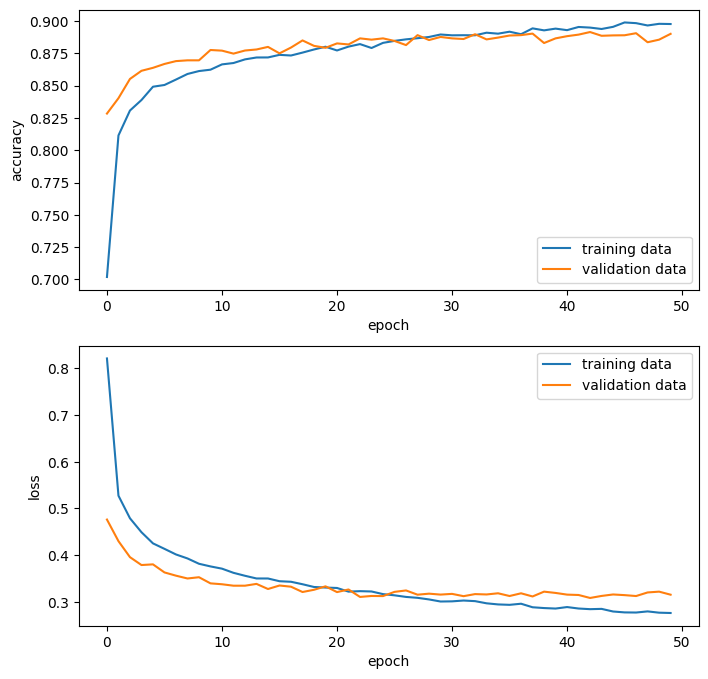

In [59]:
acc = history10.history['accuracy']
val_acc = history10.history['val_accuracy']

loss = history10.history['loss']
val_loss = history10.history['val_loss']

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(acc, label='training data')
plt.plot(val_acc, label='validation data')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(loss, label='training data')
plt.plot(val_loss, label='validation data')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();